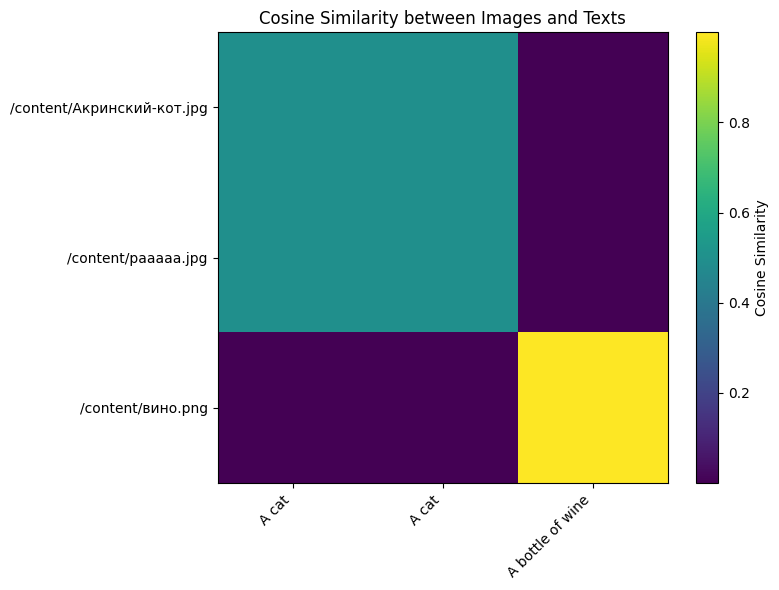

In [ ]:
import torch
import clip
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Загрузка модели CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)



[[9.8986650e-01 7.3810723e-03 2.7523509e-03]
 [6.5927175e-03 9.9268919e-01 7.1802369e-04]
 [3.3168875e-05 7.2221912e-05 9.9989462e-01]]


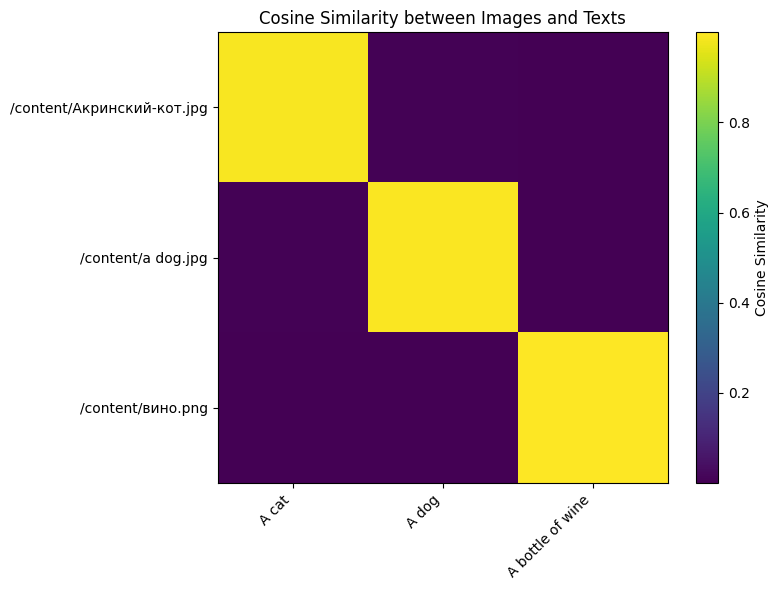

In [ ]:
# Загрузка изображений и текстов
image_files = ["/content/Акринский-кот.jpg", "/content/a dog.jpg", "/content/вино.png"]  # Замените на ваши изображения
texts = ["A cat", "A dog", "A bottle of wine"]

# Предобработка изображений
images = [preprocess(Image.open(image_file)).unsqueeze(0) for image_file in image_files]
images = torch.cat(images).to(device)

# Кодирование изображений и текстов
with torch.no_grad():
    image_features = model.encode_image(images)
    text_features = model.encode_text(clip.tokenize(texts).to(device))

# Нормализация векторов признаков
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

# Вычисление косинусного сходства
cosine_similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Преобразование в NumPy для визуализации
cosine_similarity_np = cosine_similarity.cpu().numpy()
print(cosine_similarity_np)
# Визуализация матрицы косинусного сходства
plt.figure(figsize=(8, 6))
plt.imshow(cosine_similarity_np, cmap='viridis', aspect='auto')
plt.colorbar(label='Cosine Similarity')
plt.xticks(np.arange(len(texts)), texts, rotation=45, ha='right')
plt.yticks(np.arange(len(image_files)), image_files)
plt.title('Cosine Similarity between Images and Texts')
plt.tight_layout()
plt.show()


In [ ]:
!pip install  ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.3 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-sjq1ng20
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-sjq1ng20
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=4beda34f55714c290f1d6d6f3f7a341a27afec3a96900c6fde287f8f7f708b53
  Stored in directory: /tmp/pip-ephem-wheel-cache-jqfh1rq3/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip
